In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from inspect import isfunction
import math

from einops import rearrange
from einops.layers.tensorflow import Rearrange
from functools import partial

In [3]:
# load dataset
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)
image_size = (32, 32)
colour_channels = 1
batch_size = 64

In [4]:
# normailise pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# diffusion steps
timesteps = 200

In [6]:
# variance schedule
beta = np.linspace(0.0001, 0.02, timesteps)

In [7]:
# notation for sampling forward process at arbitrary timestep in closed form
alpha = np.ones(beta.shape) - beta
alpha_bar =  np.concatenate(([1], np.cumprod(alpha, 0)[:-1]), axis=0)
root_alpha_bar = np.sqrt(alpha_bar)
root_one_minus_alpha_bar = np.sqrt(1-alpha_bar)

In [8]:
# function that uses the alpha notation to sample the forward process at arbitrary timestep in closed form
def add_noise(x_0, t):
    alpha_bar_t = np.take(alpha_bar, t)
    root_alpha_bar_t = np.take(root_alpha_bar, t)
    
    mu = x_0 * root_alpha_bar_t
    sigma = (1 - alpha_bar_t) * np.ones(x_0.shape)
    noisy_image = np.random.normal(mu, sigma, x_0.shape)
    return noisy_image

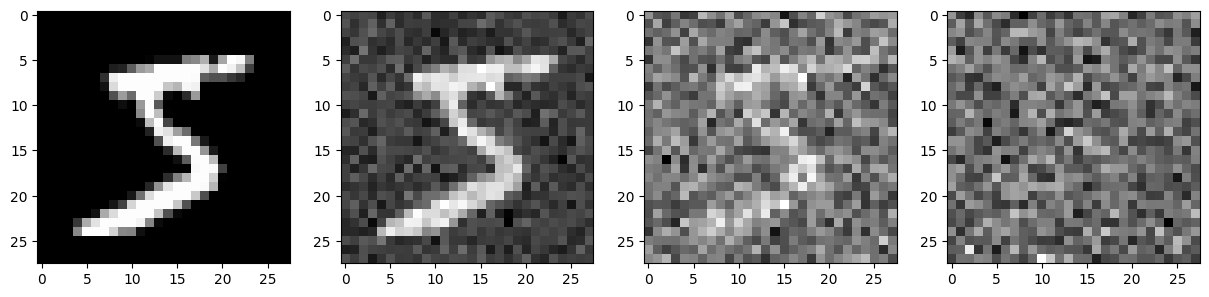

In [9]:
x_0 = train_images[0]
np.random.seed(0)
fig = plt.figure(figsize=(15,30))
for index, i in enumerate([0, 50, 100, 199]):
    plt.subplot(1, 4, index+1)
    plt.imshow(add_noise(x_0, i), cmap="gray")
plt.show()